In [2]:
import os
from tqdm import tqdm

from scipy.io import wavfile
from scipy import signal

import numpy as np

import pandas as pd
from python_speech_features import mfcc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
def features_extraction(sig, rate, nfft=2500, **kwargs):
    mfcc_feat = mfcc(sig, rate, nfft=nfft, **kwargs)
    mfcc_mean = mfcc_feat.mean(axis=0)
    mfcc_std = mfcc_feat.std(axis=0)
    return mfcc_mean, mfcc_std

In [41]:
def process_wav(wav_path,numcep=25,**kwargs):
    try:
        rate, sig = wavfile.read(path)
        mfcc_mean, mfcc_std = features_extraction(sig, rate,numcep=numcep,**kwargs)
        features = np.concatenate((mfcc_mean, mfcc_std, [emotion])).reshape(1,numcep*2+1)
        return features
    except ValueError:
        print('Error processing path {}. {}'.format(path,ValueError)) 

In [26]:
emotions.keys()

dict_keys(['Sad', 'Disgust', 'Angry', 'Fear', 'Neutral', 'Happy', 'Pleasant Surprise'])

In [107]:
dataset_path = 'dataset/toronto/'
emotions = {
    'Sad':'Bad',
    'Disgust':'Bad',
    'Angry':'Bad',
    'Fear':'Bad',
    'Neutral':'Neutral',
    'Happy':'Good',
    'Pleasant Surprise':'Good'
}


In [110]:
categories = {
    'sad':0,
    'disgust':1,
    'angry':2,
    'fear':3,
    'neutral':4,
    'happy':5,
    'surprised':6
}

In [111]:
numcep=25
dataset = np.zeros((0,numcep*2+1))
errors = ''
for category, emotion in categories.items():
    waves = [file for file in os.listdir(dataset_path+category) if file.endswith('wav')]
    for wav in tqdm(waves,desc=category):
        path = os.path.join(dataset_path,category,wav)
        features = process_wav(path)
        dataset = np.concatenate((dataset,features))
print(errors)

surprised: 100%|██████████| 400/400 [00:11<00:00, 34.82it/s]

In [112]:
np.savetxt('toronto.csv',dataset,delimiter=',', fmt="%s")

In [113]:
dataset_path = 'dataset/ravdess/'
emotions = {
    'sad':'Bad',
    'disgust':'Bad',
    'angry':'Bad',
    'fearful':'Bad',
    'neutral':'Neutral',
    'calm':'Neutral',
    'happy':'Good',
    'surprised':'Good'
}
#classes = list(set(emotions.values()))
#encoding = {classes[i]:i for i in range(len(classes))}
#folders = os.listdir(dataset_path)
#categories = emotions.copy()
#for folder in folders:
#    categories[folder] = encoding[emotions[folder]]
#categories
    

In [114]:
numcep=25
dataset = np.zeros((0,numcep*2+1))
errors = ''
for category, emotion in categories.items():
    waves = [file for file in os.listdir(dataset_path+category) if file.endswith('wav')]
    for wav in tqdm(waves,desc=category):
        path = os.path.join(dataset_path,category,wav)
        features = process_wav(path)
        dataset = np.concatenate((dataset,features))
print(errors)

surprised: 100%|██████████| 192/192 [00:10<00:00, 18.94it/s]

In [115]:
np.savetxt('ravdess.csv',dataset,delimiter=',', fmt="%s")

In [116]:
import xgboost as xgb

In [117]:
df = pd.read_csv('toronto.csv',header=None)

X_toronto = df.iloc[:,:-1].values
y_toronto = df.iloc[:,-1].values
X_train_toronto, X_test_toronto, y_train_toronto, y_test_toronto = train_test_split(X_toronto,y_toronto,test_size=0.3)

In [ ]:
## df = pd.read_csv('ravdess.csv',header=None)
                 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)trb

### Toronto

In [145]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05).fit(X_train_toronto,y_train_toronto)
predictions = gbm.predict(X_test_toronto)
accuracy = accuracy_score(y_test_toronto, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.40%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


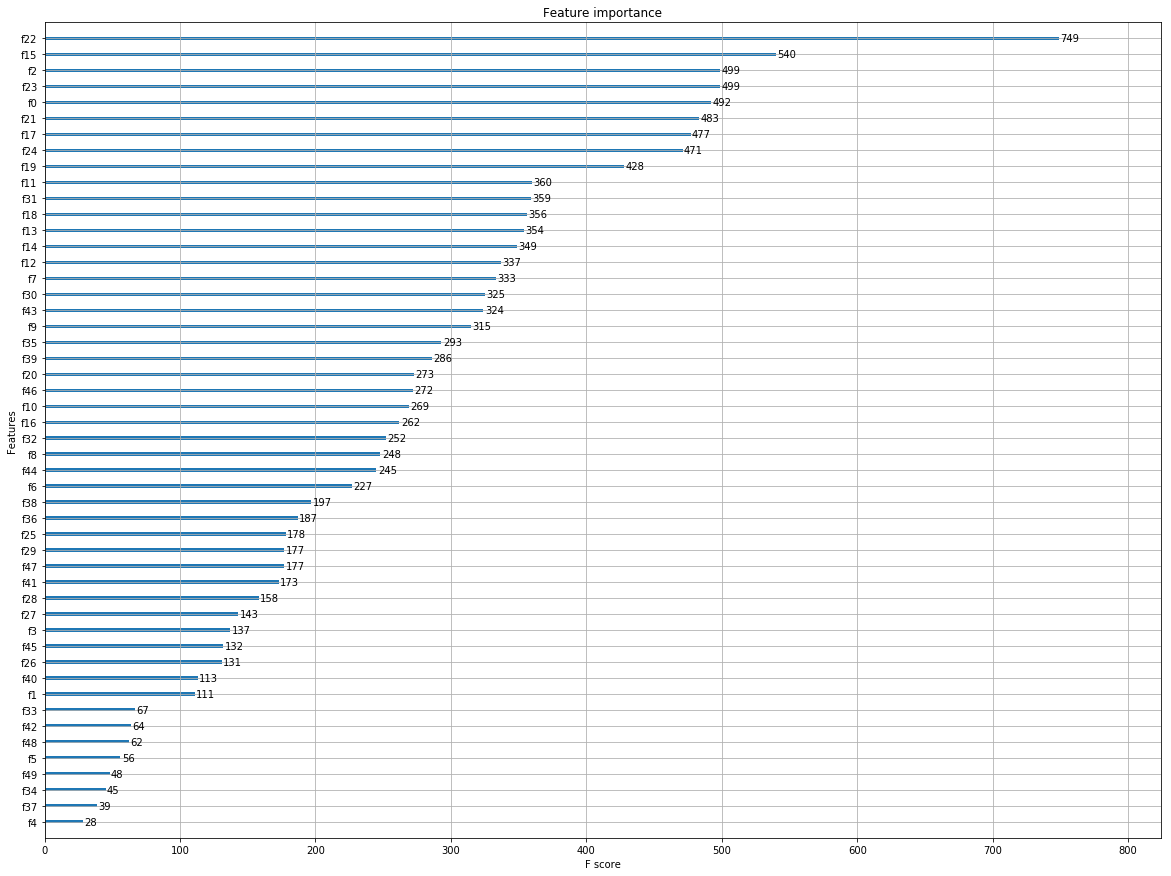

In [146]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 15))
plot_importance(gbm,ax)
plt.show()

### Toronto -> Ravdess

In [120]:
predictions = gbm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 17.87%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Ravdess

In [128]:
y_test.shape

(375,)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 57.07%


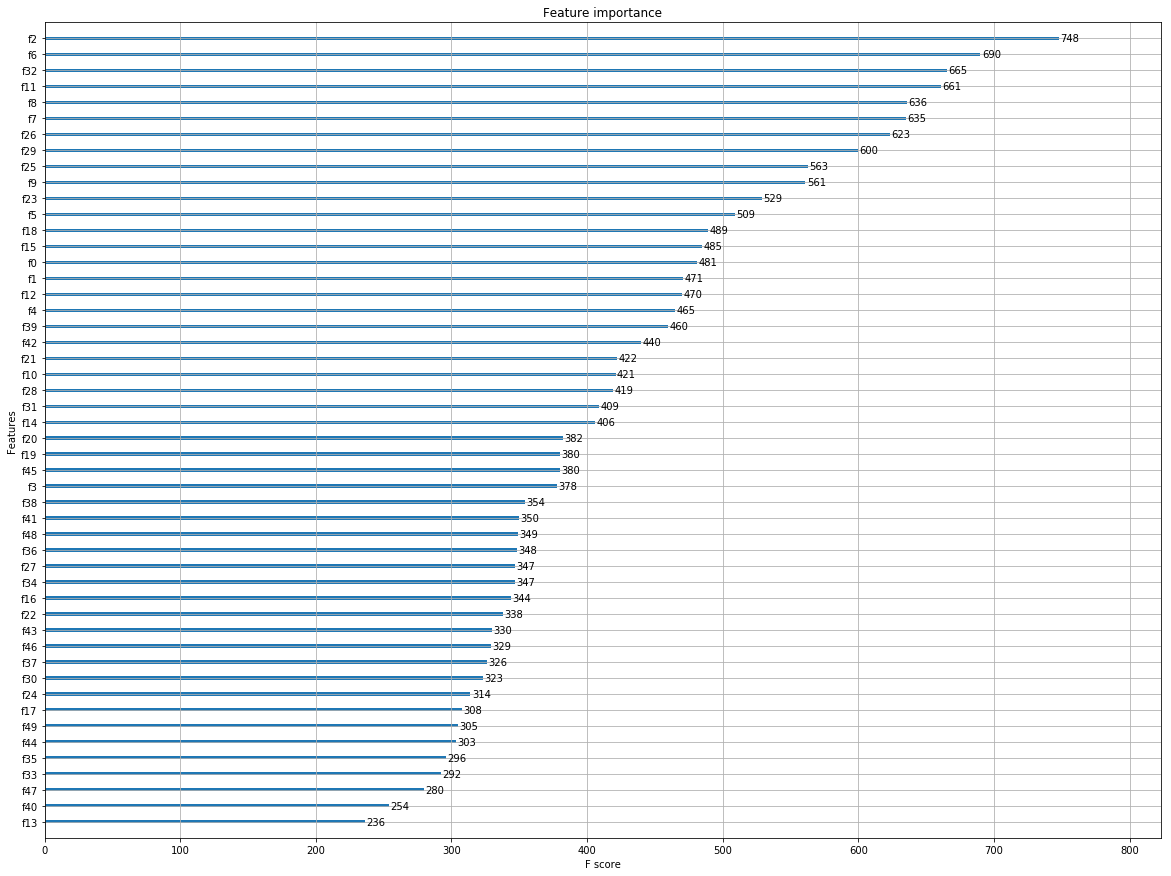

In [143]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05).fit(X_train,y_train)
predictions = gbm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
fig, ax = plt.subplots(figsize=(20, 15))
plot_importance(gbm,ax)
plt.show()

### Ravdess ->Toronto

### Mixed

In [123]:
df_t = pd.read_csv('toronto.csv',header=None)
df_r = pd.read_csv('ravdess.csv',header=None)
df = df_t.append(df_r)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 56.27%


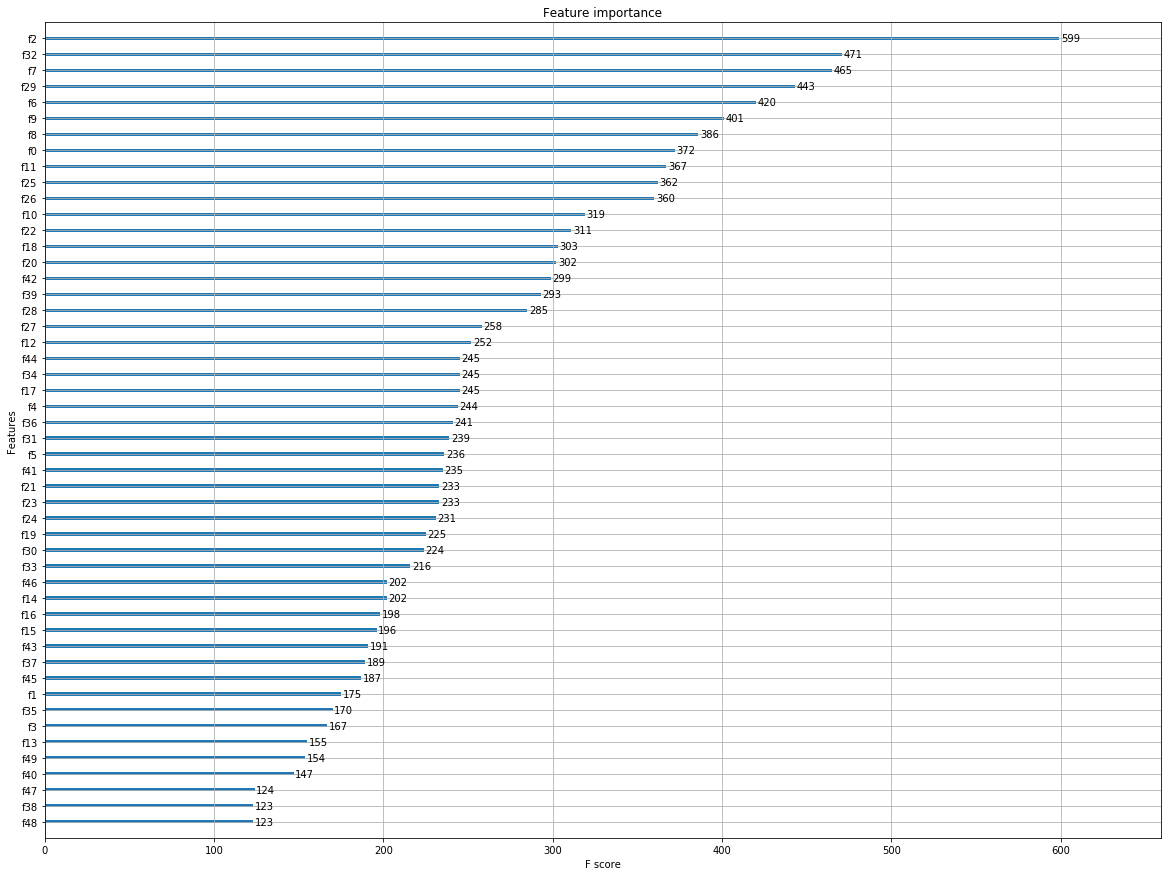

In [147]:
X_mix = df.iloc[:,:-1].values
y_mix = df.iloc[:,-1].values
X_train_mix, X_test_mix, y_train_mix, y_test_mix = train_test_split(X,y,test_size=0.3)
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train_mix,y_train_mix)
predictions = gbm.predict(X_test_mix)
accuracy = accuracy_score(y_test_mix, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
fig, ax = plt.subplots(figsize=(20, 15))
plot_importance(gbm,ax)
plt.show()